# Notebook imports and packages

In [84]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Example 1 - a simple cost function
$f(x) = x^2 + x + 1$

In [85]:
def f(x):
    return x**2 + x + 1

In [86]:
#Make date
x_1 = np.linspace(start=-3, stop=3, num=500) #generate a 500 numbers between -3 and 3.

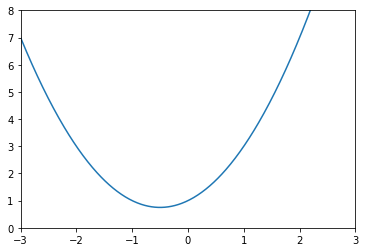

In [87]:
#Plot
plt.xlim(-3, 3)
plt.ylim(0,8)
plt.plot(x_1, f(x_1))
plt.show()

## Slope and derivatives

### Power rule: $x^n = n * x ^n-^1 $

In [88]:
def df(x):
    return 2 * x + 1

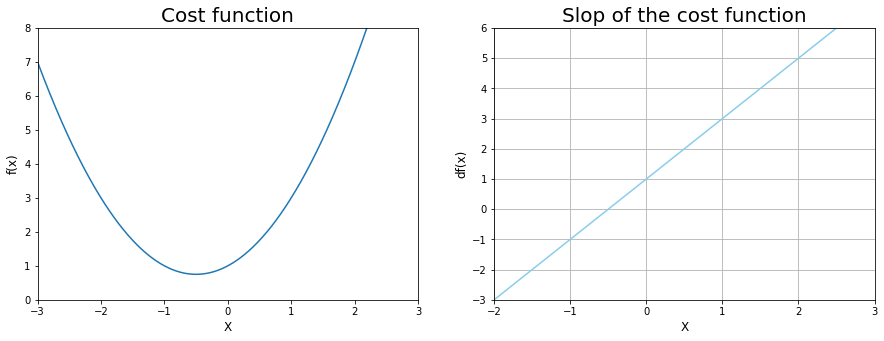

In [89]:
#Plot function derivative side by side
plt.figure(figsize=[15, 5])

#1 Chart - cost function
plt.subplot(1, 2, 1)#wiersze, kolumny, index wykresu

plt.xlim(-3, 3)
plt.ylim(0,8)

plt.plot(x_1, f(x_1))

plt.title('Cost function', fontsize=20)
plt.xlabel('X', fontsize=12)
plt.ylabel('f(x)', fontsize=12)


#2 Chart - derivative(pochodna)
plt.subplot(1, 2, 2)

plt.ylim(-3, 6)
plt.xlim(-2, 3)

plt.plot(x_1, df(x_1), color='skyblue')

plt.title('Slop of the cost function', fontsize=20)
plt.xlabel('X', fontsize=12)
plt.ylabel('df(x)', fontsize=12)

plt.grid()#kratka

plt.show()

## Gredient Descent

In [90]:
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)] 

for i in range (500):
    previous_x = new_x
    gredient = df(previous_x)
    new_x = previous_x - step_multiplier * gredient
    
    step_size = abs(new_x - previous_x)
    #print(step_size)
    x_list.append(new_x)
    slope_list.append(df(new_x))
    if step_size < precision:
        break
    
print(f'Local minimum is: {new_x}')
print(f'Slop or df(x) value at this point is: {df(new_x)}')
print(f'f(x) value or cost at this point is: {f(new_x)}')

Local minimum is: -0.49962781616118024
Slop or df(x) value at this point is: 0.0007443676776395236
f(x) value or cost at this point is: 0.7500001385208099


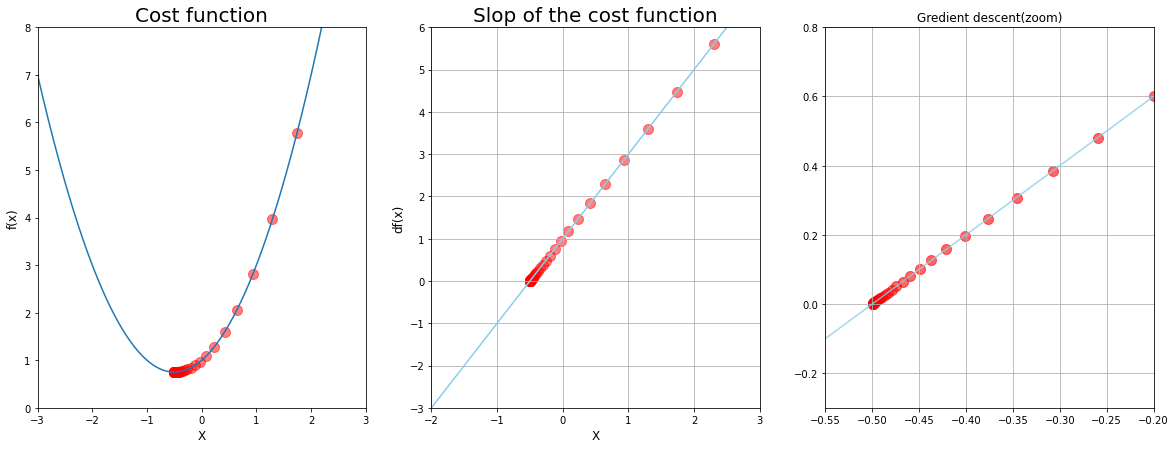

In [91]:
#Superimpose the gredient descent calculations plot
plt.figure(figsize=[20, 7])

#1 Chart - cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0,8)

plt.plot(x_1, f(x_1))

plt.title('Cost function', fontsize=20)
plt.xlabel('X', fontsize=12)
plt.ylabel('f(x)', fontsize=12)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.5)


#2 Chart - derivative(pochodna)
plt.subplot(1, 3, 2)

plt.ylim(-3, 6)
plt.xlim(-2, 3)

plt.plot(x_1, df(x_1), color='skyblue')

plt.title('Slop of the cost function', fontsize=20)
plt.xlabel('X', fontsize=12)
plt.ylabel('df(x)', fontsize=12)

plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

plt.grid()

#3 Chart - derivative(zoom)
plt.subplot(1, 3, 3)

plt.title('Gredient descent(zoom)')
plt.plot(x_1, df(x_1), color='skyblue', alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.6)

plt.ylim(-0.3, 0.8)
plt.xlim(-0.55, -0.2)

plt.grid()#kratka

plt.show()

# Example 2 - Multiple Minima vs Initial Guess and Advanced Functions

## $$g(x) = x^4 -4x^2 + 5$$

In [92]:
#Make some data
x_2 = np.linspace(-2, 2, 1000)

In [93]:
def g(x):
    return x**4 - 4*x**2 + 5

In [94]:
def dg(x):
    return 4*x**3 - 8*x

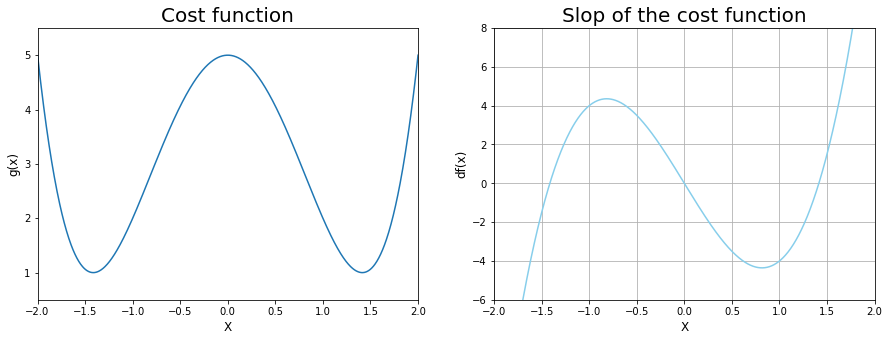

In [95]:
#Plot function derivative side by side
plt.figure(figsize=[15, 5])

#1 Chart - cost function
plt.subplot(1, 2, 1)#wiersze, kolumny, index wykresu

plt.xlim(-2, 2)
plt.ylim(0.5 ,5.5)

plt.plot(x_2, g(x_2))

plt.title('Cost function', fontsize=20)
plt.xlabel('X', fontsize=12)
plt.ylabel('g(x)', fontsize=12)


#2 Chart - derivative(pochodna)
plt.subplot(1, 2, 2)

plt.ylim(-6, 8)
plt.xlim(-2, 2)

plt.plot(x_2, dg(x_2), color='skyblue')

plt.title('Slop of the cost function', fontsize=20)
plt.xlabel('X', fontsize=12)
plt.ylabel('df(x)', fontsize=12)

plt.grid()#kratka

plt.show()

## Gredient Descent as a Python Function

In [105]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)] 

    for i in range (max_iter):
        previous_x = new_x
        gredient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gredient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [97]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print(f'Local min occurs at: {local_min}')
print(f'Number of steps: {len(list_x)}')

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [98]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5, 
                                                 multiplier=0.02, precision=0.001)
print(f'Local min occurs at: {local_min}')
print(f'Number of steps: {len(list_x)}')

Local min occurs at: -1.4122375085019094
Number of steps: 23


In [99]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5)
print(f'Local min occurs at: {local_min}')
print(f'Number of steps: {len(list_x)}')

Local min occurs at: -1.4122375085019094
Number of steps: 23


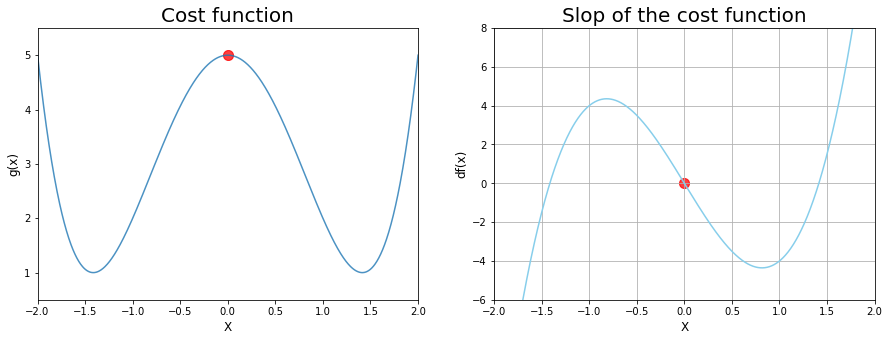

In [100]:
#Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0)

#Plot function and derivative and scatter side by side
plt.figure(figsize=[15, 5])

#1 Chart - cost function
plt.subplot(1, 2, 1)#wiersze, kolumny, index wykresu

plt.xlim(-2, 2)
plt.ylim(0.5 ,5.5)

plt.plot(x_2, g(x_2), alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.5)

plt.title('Cost function', fontsize=20)
plt.xlabel('X', fontsize=12)
plt.ylabel('g(x)', fontsize=12)


#2 Chart - derivative(pochodna)
plt.subplot(1, 2, 2)

plt.ylim(-6, 8)
plt.xlim(-2, 2)

plt.plot(x_2, dg(x_2), color='skyblue')
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.title('Slop of the cost function', fontsize=20)
plt.xlabel('X', fontsize=12)
plt.ylabel('df(x)', fontsize=12)

plt.grid()#kratka

plt.show()

# Example 3 - Divergence, Overflow and Python Tuples
## $$h(x) = x^5 - 2x^4 + 2$$

In [101]:
#Make data
x_3 = np.linspace(start=2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2
def dh(x):
    return 5*x**4 - 8*x**3

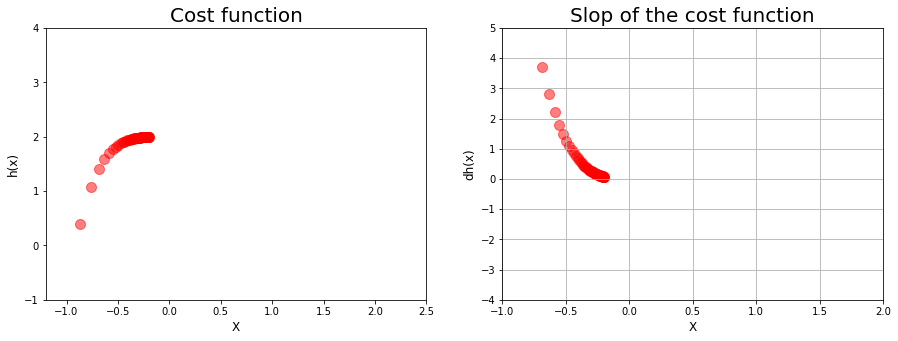

Local min occurs at: -2071072.4470816324
COst at this minimum is: -3.810455326061589e+31
Number of steps: 71


In [111]:
#Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=-0.2, max_iter=70)

#Plot function and derivative and scatter side by side
plt.figure(figsize=[15, 5])

#1 Chart - cost function
plt.subplot(1, 2, 1)#wiersze, kolumny, index wykresu

plt.title('Cost function', fontsize=20)
plt.xlabel('X', fontsize=12)
plt.ylabel('h(x)', fontsize=12)
plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.plot(x_3, h(x_3))
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.5)



#2 Chart - derivative(pochodna)
plt.subplot(1, 2, 2)

plt.title('Slop of the cost function', fontsize=20)
plt.xlabel('X', fontsize=12)
plt.ylabel('dh(x)', fontsize=12)
plt.xlim(-1, 2)
plt.ylim(-4, 5)
plt.grid() #kratka

plt.plot(x_3, dh(x_3))
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print(f'Local min occurs at: {local_min}')
print(f'COst at this minimum is: {h(local_min)}')
print(f'Number of steps: {len(list_x)}')

In [117]:
import sys
sys.float_info.max

1.7976931348623157e+308

## Python Tuples

In [118]:
## Tuples are immutable(cannot add new vlues or modify), heterogenues(diversity of types: str, int, float) 

In [124]:
#Example
school = 'teacher', 3, 2.5
school[0] = 'politician'
idiot, grade, classes = school
print("Yo", idiot)

TypeError: 'tuple' object does not support item assignment